In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

<IPython.core.display.Javascript object>

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, f1_score

knn_clf = KNeighborsClassifier()
y_train_predict = cross_val_predict(knn_clf, X_train, y_train, cv = 3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = [n]

In [ ]:
# 5 digit classifier
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [ ]:
never5_clf = Never5Classifier()
cross_val_score(never5_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)
confusion_matrix(y_train_5, y_train_pred)

In [ ]:
y_train_perfect_predictions = y_train_5 # pretend we 
confusion_matrix(y_train_5, y_train_perfect_predictions)

In [ ]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

* The model correctly predicts 5s 83% of the time
* The model is able to predict only 65% of the 5s

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = 'decision_function')

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train_5, y_train_pred_90)

In [ ]:
import seaborn as sns
sns.lineplot(precisions, recalls)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold and add the legend, axis label, and grid
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.legend()
plt.show()

## ROC Curve

In [ ]:
y_train_5

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    [...] # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

## MultiClass Classification

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

In [ ]:
some_digit = X[0]
svm_clf.predict([some_digit])

In [ ]:
svm_digit_scores = svm_clf.decision_function([some_digit])
svm_digit_scores

* Under the hood, svm deploys OVO in training 45 binary classifiers
* For given test images, it predicts using 45 classifiers and picks one that won most duels

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

## MultiLabel Classification

In [ ]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [ ]:
some_digit = X[0]

In [ ]:
knn_clf.predict([some_digit])

* Metric for multilabel : Consider two labels - Compute F1 score for each and take average
* This weights both the labels equally. But what if one of the label is not imbalanced?
* To correct this, we can use weighted average (each label is weighted by number of instances with that target label)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict


y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average = 'macro') # Considering equal weightage
f1_score(y_multilabel, y_train_knn_pred, average = 'weighted') # Considering weightage based on num of instances

## Multioutput Classification

* This is more like predicting multiple values (>2) for each label in multilabel Classification
* Example : predicting each image pixels in mnist data
* It sound similar to regression of predicting nunmerical values though !

In [ ]:
# Create random noise to data and predict the mnist data
noise = np.random.randint(0, 100, (len(X_train)), 784)
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test)), 784)
X_test_mod = X_test + noise

# Predicting images from noisy images
y_train_mod = X_train
y_test_mod = X_test


In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict(X_test_mod[0])
pl

In [ ]:
plt.imshow(clean_digit, cmap="binary")
plt.axis("off")
plt.show()

## Titanic Dataset

In [9]:
import pandas as pd
import numpy as np

In [12]:
train = pd.read_csv(r"datasets\titanic\train.csv")
test = pd.read_csv(r"datasets\titanic\test.csv")

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
## Selecting Variables 
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names]


In [18]:
# Numerical Variable : 1. Select, 2. Impute
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ("numerical_variables", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
    ("imputer", SimpleImputer(strategy = "median"))
    ])
num_pipeline.fit_transform(train)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [19]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    # Inspired from stackoverflow.com/questions/25239958
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [21]:
# Cat Variable : 1. Select, 2. Impute, 3. Onehotencode
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ("categorical_variable", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
    ("Frequent_Impute", MostFrequentImputer()),
    ("One_Hot_Encode", OneHotEncoder(sparse = False))
])
cat_pipeline.fit_transform(train)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [23]:
from sklearn.pipeline import FeatureUnion

preprocessing_pipeline = FeatureUnion([
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])
preprocessing_pipeline.fit_transform(train)

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [25]:
X_train = preprocessing_pipeline.fit_transform(train)
y_train = train['Survived'].values

X_test = preprocessing_pipeline.transform(test)

In [28]:
from sklearn.svm import SVC

svc_clf = SVC(gamma = "auto")
svc_clf.fit(X_train, y_train)

SVC(gamma='auto')

In [29]:
from sklearn.metrics import accuracy_score

y_pred = svc_clf.predict(X_train)
accuracy_score(y_pred, y_train)

0.8877665544332211

In [35]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svc_clf, X_train, y_train, cv = 10)
svm_scores.mean()

0.7329588014981274

In [36]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8126466916354558

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

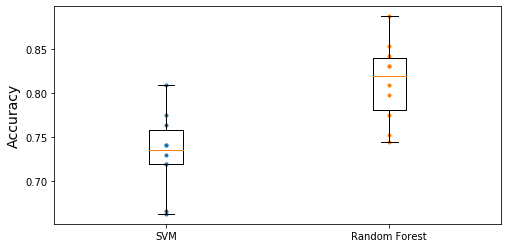

In [37]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()